# Using SoS with Jupyter notebook

<font color='red'>This document is under development</font>

[Jupyter](http://jupyter.org/) notebook is a web application that allows you to create documents with live code and results. The underlying interpreters of the cells are called **kernel**. For example, you can use a `python` kernel to interpret python expressions, or a `ir` kernel to interpret `R` commands. You can use sos within a `python` kernel by loading the `sos_magic` ipython extension, or use a `sos` kernel to work in a complete SoS environment.

In addition to the ability to execute SoS workflows within Jupyter, the SoS kernel allows you to start subkernels (e.g. [`irkernel`](https://github.com/IRkernel/IRkernel) for [the R langauage](https://www.r-project.org/)) and switch between the subkernels in the same notebook. This allows for truly integrated data analysis using different langauages.

## Installing the SoS kernel

The SoS installation process will install a SoS kernel by default. To verify if you have the sos kernel installed, use command `jupyter kernelspec list` from command line (here we use the `!` magic to run commands from Jupyter notebook):

In [1]:
!jupyter kernelspec list

Available kernels:
  python3    /Users/bpeng1/bin/anaconda/lib/python3.5/site-packages/ipykernel/resources
  ir         /Users/bpeng1/Library/Jupyter/kernels/ir
  sos        /Users/bpeng1/bin/anaconda/share/jupyter/kernels/sos


and check if you have `sos` listed as one of the kernels. If not, try to re-install SoS using `pip3 install sos --upgrade` or clone SoS locally and run `python setup.py install`. If the kernel is installed, fire Jupyter using command
```
$ jupyter notebook
```
from the `New` button to the top right corner, select `SoS`, and create a SoS notebook.

You can also start a qtconsole with the SoS kernel using command
```
$ jupyter qtconsole --kernel sos
```
or even [use the SoS kernel in Spyder](../tutorials/Using_SoS_with_Spyder.html). Most of the features described in this section also applies to `qtconsole` and `spyder`.

Note that SoS uses [imagemagick](http://www.imagemagick.org/script/index.php) and python package [`wand`](http://docs.wand-py.org/en/0.4.2/) to preview output files so it is recommended that you install these packages.

## Acceptable statements

You can enter any SoS expression, statements, and workflows in a Jupyter notebook. More specifically, you can enter

* any Python expression and statements. For example, you can write pieces of SoS code and evaluate them

In [2]:
res_path = '/path/to/resource'
ref_genome = "${res_path}/hg19"

* any SoS actions in function or script format. For example, you can execute a shell script using

In [3]:
run:
    echo Reference genome is located at ${ref_genome}

Reference genome is located at /path/to/resource/hg19


* markdown cells to document your workflow. These cells are not evaluated by SoS so string interpolations are not available to these cells.

* SoS workflows with one or more steps.

In [4]:
[10]
print("I am in ${step_name}")
[20]
print("I am in ${step_name}")
[30]
print("I am in ${step_name}")

I am in default_10
I am in default_20
I am in default_30


Technically speaking, SoS prefixes input with a default header if no header is present, and execute all input as SoS workflows. The major differences between running SoS scripts in batch mode and Jupyter notebook is the scope of variables. Whereas in Jupyter notebook all scripts are executed in the same namespace (SoS dictionary) with shared variables, SoS batch mode executes each step in separate processes with their own namespaces, with additional rules such as readonly global variables.

## Use of subkernels

One of the most important features of the SoS kernel is its support for multiple Jupyter subkernel. Using a `%use kernel` magic, you can start (and/or switches to) an alternative jupyter kernel and use a completely different script in the same notebook.

A `kernel` can be any [Jupyter supported kernels](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages) that have been installed locally. In particular, you can use `ir` for R kernel, `python3` for python3, `iperl` for perl, `bash` for bash. Please refer to [IRKernel](https://github.com/IRkernel/IRkernel) for instructions on how to install the `ir` kernel for `R`.

For example,

In [5]:
%use R

starts and switches to a `ir` kernel so that you can enter any R commands as if you are working on a notebook with a `ir` kernel

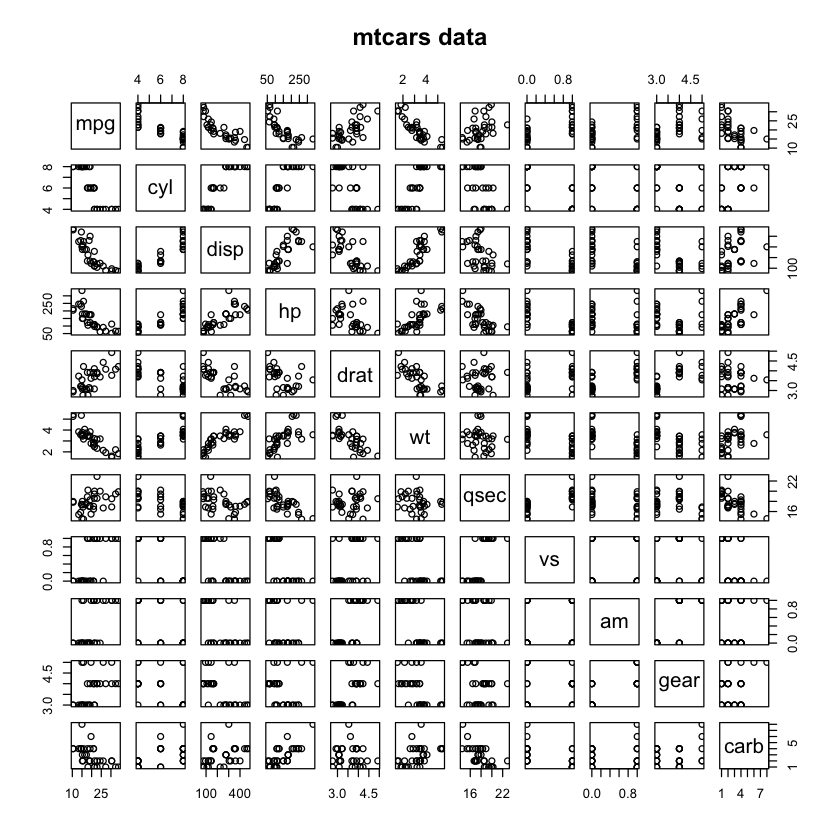

In [6]:
require(graphics)
pairs(mtcars, main = "mtcars data")

After you are done with the `ir` kernel, you can switch back to the SoS kernel using magic

In [7]:
%use sos

SoS will interpolate cell content before it is passed to the subkernel. For example, if you save a dataframe to a file with name in `filename`,

In [8]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.random.randn(6,4),columns=list('ABCD'))
filename = 'mydata.csv'
data.to_csv(filename, index=False)
data

A         B         C         D
0  0.091369 -1.298381 -0.604253 -0.475333
1  0.235493 -1.938806  0.520555  0.247224
2  0.240833  0.044925 -0.919717 -0.148007
3 -0.498337  0.437549 -1.002211  0.318255
4  0.133640 -1.339026  0.100303  0.143069
5  0.840497 -0.554317  0.580189 -0.388391

you can pass the filename to kernel `ir` using `${filename}` as follows

In [9]:
%use R
d <- read.csv(${filename!r})
d

d <- read.csv('mydata.csv')
d
## -- End interpolated command --


A           B          C          D         
1  0.09136929 -1.2983810 -0.6042534 -0.4753332
2  0.23549260 -1.9388059  0.5205545  0.2472241
3  0.24083316  0.0449251 -0.9197170 -0.1480071
4 -0.49833681  0.4375495 -1.0022110  0.3182553
5  0.13363975 -1.3390255  0.1003028  0.1430690
6  0.84049669 -0.5543165  0.5801888 -0.3883907

Although string interpolation allows you to **compose** scripts in other languages, it is not a particularly good way to exchange data between SoS and subkernels. Fortunately, the SoS kernel provides a mechanism to pass variables between SoS and some subkernels using SoS magics.

For example, magic `%get` can get specified SoS variables from the SoS kernel to the subkernel `ir`.

In [10]:
%get data
data

A           B          C          D         
1  0.09136929 -1.2983810 -0.6042534 -0.4753332
2  0.23549260 -1.9388059  0.5205545  0.2472241
3  0.24083316  0.0449251 -0.9197170 -0.1480071
4 -0.49833681  0.4375495 -1.0022110  0.3182553
5  0.13363975 -1.3390255  0.1003028  0.1430690
6  0.84049669 -0.5543165  0.5801888 -0.3883907

SoS tries its best to find the best-matching data types between SoS and the subkernel and convert the data in the subkernel's native datatypes (e.g. Python's `DataFrame` to R's `data.frame`), so the variables you get will always be in the subkernel's native data types, not a wrapper of a foreign object (for example objects provided by `rpy2`). 

In [11]:
class(data)

[1] "tbl_df"     "tbl"        "data.frame"

Unfortunately, although any subkernel can be started, SoS currently only support data exchange between `SoS`, `python3`, and `ir` kernels. SoS provides [an interface to add support for other languages](../documentation/Extending_SoS.html). Please considering adding SoS support for your favoriate kernel with a pull request.

In [12]:
# clean up
%use sos
!rm mydata.csv 